# Module: Programming for Data Analysis

# Project 2019

# Lecturer: Brian McGinley

## Introduction
 The Objective of this project is
 
    - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four diﬀerent variables. 
    - Investigate the types of variables involved, their likely distributions, and their relationships with each other.
    - Synthesise/simulate a data set as closely matching their properties as possible.
    - Detail research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Real-world phenomenon 

I decide to look at the socioeconomic factors effecting health of people age 18 - 64 in Ireland. The link between general health and socio-economic status is well established.First I have to look at the variables in the dataset

I select few socio economics factors for creating the dataset

- Gender: 
- Age:
- Education:
- Employment Status:(Full Time, self_employed, Unemployed)
- Marital Status:
- Living Area:(Urban,Rural)
- Income:

- General Health:

## Simulate Dataset

we  have to collect the data of 1000 people.

In [1]:
#import libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data1 = ['GENDER: Female,Male',
         'AGE: years',
         'EDUCATION:',
         'AREA: ',
         'MARITAL_STATUS: ',
         'EMPLOYMENT_STATUS: ',
         'INCOME: Income yearly',
         'GENERAL_HEALTH:'
]
short_names = [d.split(':')[0] for d in data1]
data=pd.DataFrame(columns = short_names)

data

,GENDER,AGE,EDUCATION,AREA,MARITAL_STATUS,EMPLOYMENT_STATUS,INCOME,GENERAL_HEALTH


## Gender

Gender is a categorical variable, it has two categories male and female. In this dataset the number of males and females are not equal.

numpy.random.choice() is used to generates a random sample from  list gender that has two values ['male','female] .there are many health conditions that vary with gender therefore gender is an important variable.

In [3]:
np.random.seed(256) # Set the random seed
gender=['Male','Female']

data['GENDER']= np.random.choice(gender, 1000)

data['GENDER'].value_counts()

Male      531
Female    469
Name: GENDER, dtype: int64

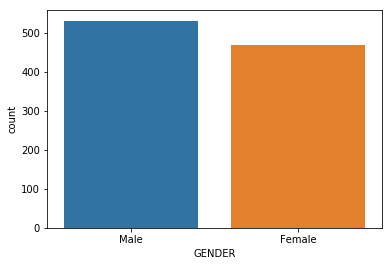

In [4]:
sns.countplot(x=data['GENDER'])

## Age 
Age column data is a numerical data. 
to simulate the data for age column use numpy.random.randint  .

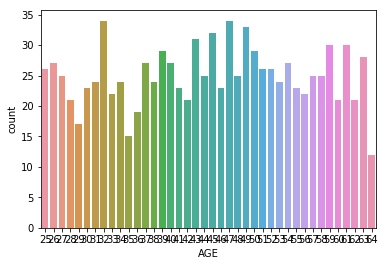

In [5]:
np.random.seed(256) # Set the random seed
data['AGE'] = np.random.randint(25,65, size= 1000,dtype='int')
##age=['18-29','30-44','45-64','65+']
##data['AGE'] = np.random.choice(age, 1000, p=[0.25,0.31,0.29,0.15])
sns.countplot(data['AGE'])
# In first attempt i used the following code as i think of numeric data 
#but than i changed to categories as i found slan statistics better
###data['AGE'] = np.random.randint(25,45, size= 1000,dtype='int')
#data = data.astype({"AGE": int})

In [6]:
bins = [24, 35, 45, 55, 64]
#cats = pd.cut(data['AGE'], bins)
cats= pd.cut(data['AGE'],bins,right=False)
pd.value_counts(cats)

[45, 55)    279
[24, 35)    243
[35, 45)    241
[55, 64)    225
Name: AGE, dtype: int64

## Education
education is very important indicator of socioeconomics class  and health. As people with higher education are more aware of issue like healthy eating ,healthy lifestyle and mental health.
the data in the column is correspondent to the cso.ie statisics about education
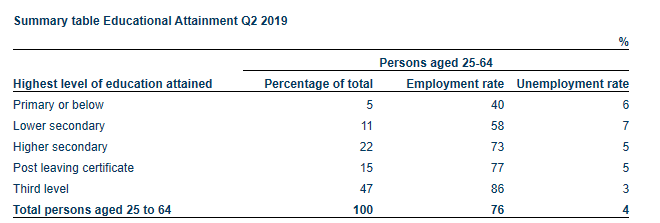


In [38]:
np.random.seed(256)

Edu= ['Third Level','Post Leaving CERT','Higher Secondary','Lower Secondary','Primary or Below']
#source: https://www.cso.ie/en/releasesandpublications/er/eda/educationalattainmentthematicreport2019/
data['EDUCATION']= np.random.choice(Edu, 1000, p=[0.47,0.15,0.22,0.11,0.05])
data.head(5)


,GENDER,AGE,EDUCATION,AREA,MARITAL_STATUS,EMPLOYMENT_STATUS,INCOME,GENERAL_HEALTH
0,Male,57,Third Level,Urban,Single,Employed,30925,Good Health
1,Male,64,Post Leaving CERT,Urban,Married,Employed,24897,Good Health
2,Female,26,Third Level,Urban,Single,Employed,33837,Good Health
3,Female,50,Third Level,Urban,Single,Employed,33157,Good Health
4,Male,63,Third Level,Urban,Single,Employed,30531,Good Health


## Area 
It is a categorical data column with values {urban,rural}
np.random.choice() is used to get values randomly and cso.ie statistics is used as probability that satate 63% lives in urban area and 37% lives in rural area

In [39]:
np.random.seed(256)
Area = ['Urban','Rural']
#source:https://www.cso.ie/en/releasesandpublications/ep/p-cp2tc/cp2pdm/
data['AREA']= np.random.choice(Area, 1000, p=[0.63,0.37])
#data

## Marital Status
Marital status is a categorical data column that has values from list ['Single','Married','Separated','Divorced','Widowed']

The percentage we too from the cso.ie data source

- Single (41.1%) 
- Married (47.7%)
- Separated (3.0%) 
- Divorced (3.0%)
- Widowed (5.2%)

source: https://www.cso.ie/en/releasesandpublications/ep/p-cp4hf/cp4hf/ms/

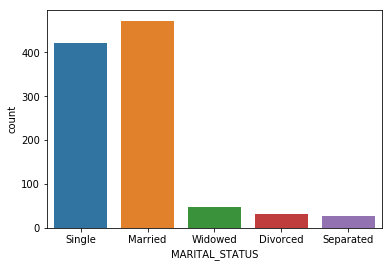

In [40]:
np.random.seed(256) # Set the random seed
ms =['Single','Married','Separated','Divorced','Widowed']
data['MARITAL_STATUS']= np.random.choice(ms, 1000, p=[0.411,0.477,0.03,0.03,0.052])
sns.countplot(data['MARITAL_STATUS'])

## Employment Status
According to cso.ie 
Unemployment rate is  6% 
Employment rate is 80% 
Self employed 14%


In [41]:
np.random.seed(256) # Set the random seed
a=['Employed','Unemployed']
data['EMPLOYMENT_STATUS']= np.random.choice(a, 1000, p=[0.87,0.13])


## Income

In [42]:


np.random.seed(42)
#arr = np.arange(1, len(df[df.YN == 'N']) + 1)
#np.random.shuffle(arr)
#'Third Level,','Post Leaving CERT','Higher Secondary', 'Lower Secondry'
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.EDUCATION[idx] == 'Primary or Below':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(18095,20000)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)
    if data.EDUCATION[idx] == 'Lower Secondary':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(22443,24000)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)  
    if data.EDUCATION[idx] == 'Higher Secondary':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(25000,27000)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)
    if data.EDUCATION[idx] == 'Post Leaving CERT':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(24627,25627)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)
    if data.EDUCATION[idx] == 'Third Level':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(30065,35000)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)
        


In [43]:
data.head(5)

,GENDER,AGE,EDUCATION,AREA,MARITAL_STATUS,EMPLOYMENT_STATUS,INCOME,GENERAL_HEALTH
0,Male,57,Third Level,Urban,Single,Employed,30925,Good Health
1,Male,64,Post Leaving CERT,Urban,Married,Employed,24897,Good Health
2,Female,26,Third Level,Urban,Single,Employed,33837,Good Health
3,Female,50,Third Level,Urban,Single,Employed,33157,Good Health
4,Male,63,Third Level,Urban,Single,Employed,30531,Good Health


## General Health

for general health in Ireland 
- 84.2% good health
- 3.3%very bad and bad
- 12.5% fair 
source https://ec.europa.eu/eurostat/cache/infographs/qol/index_en.html

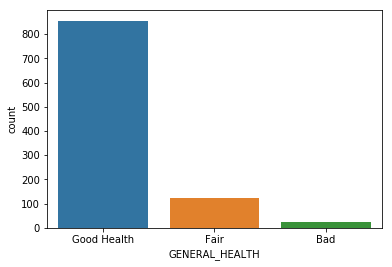

In [50]:
np.random.seed(256) # Set the random seed
gh=['Good Health','Bad','Fair']
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.INCOME[idx] > 15000:
           data.loc[idx, 'GENERAL_HEALTH'] = np.random.choice(gh, p=[0.842,0.033,0.125])
    else:
           data.loc[idx,'GENERAL_HEALTH']= np.random.choice(gh, p=[0.30,0.45,0.25])
        
sns.countplot(data['GENERAL_HEALTH'])

In [51]:
data.head(5)
df=pd.DataFrame(data)
df

,GENDER,AGE,EDUCATION,AREA,MARITAL_STATUS,EMPLOYMENT_STATUS,INCOME,GENERAL_HEALTH
0,Male,57,Third Level,Urban,Single,Employed,30925,Good Health
1,Male,64,Post Leaving CERT,Urban,Married,Employed,24897,Good Health
2,Female,26,Third Level,Urban,Single,Employed,33837,Good Health
3,Female,50,Third Level,Urban,Single,Employed,33157,Good Health
4,Male,63,Third Level,Urban,Single,Employed,30531,Good Health
5,Female,48,Third Level,Urban,Single,Employed,34491,Good Health
6,Female,27,Third Level,Urban,Single,Employed,33509,Good Health
7,Male,49,Third Level,Urban,Single,Employed,33236,Good Health
8,Female,32,Higher Secondary,Rural,Married,Employed,25871,Good Health
9,Male,61,Third Level,Urban,Single,Employed,30195,Good Health


# Social Class

The entire population is classified into one of the following social class groups (introduced in 1996) which are defined on the basis of occupation (coded using Soc90):
1. Professional workers
2. Managerial and technical
3. Non-manual
4. Skilled manual
5. Semi-skilled
6. Unskilled
7. All others gainfully occupied and unknown

The occupations included in each of these groups have been selected in such a way as to bring together, as far as possible, people with similar levels of occupational skill.

In determining social class no account is taken of the differences between individuals on the basis of other characteristics such as education. Accordingly social class ranks occupations by the level of skill required on a social class scale ranging from 1 (highest) to 7 (lowest). This scale combines occupations into six groups by occupation and employment status following procedures similar to those outlined above for the allocation of socio-economic group. A residual category “All others gainfully occupied and unknown” is used where no precise allocation is possible.
source:https://www.cso.ie/en/releasesandpublications/ep/p-cp4hf/cp4hf/bgn/

For dataset we are using 4 categories these
SC 1-2 (Upper) 31.4% 
SC 3-4 (Middle) 37.6%
SC 5-6 (Lower) 16.1% 
Unclassified 14.9%

In [ ]:
np.random.seed(256) # Set the random seed
a=['Upper','Middle','Lower','Unclassified']
data['Social_Class']= np.random.choice(a, 1000, p=[0.314,0.376,0.161,0.149])
sns.countplot(data['Social_Class'])

In [ ]:
data.head(5)

## Household income
- Under €10,000  3.9%
- €10,000 – €19,000 15.4%
- €20,000 – €29,999 17.3%
- €30,000 – €39,999 16.7%
- €40,000 – €49,999 16.8%
- €50,000 or more 30.0%

The equivalised household (HH) income is calculated based on the above figures using the national equivalence scale (Callan et al, 1996). The equivalised HH income (units: weekly net household incomes) adjusts for household size such that the needs of the composition of households are taken into account. The national equivalence scale used here attributes a weight of 1 to the first adult, 0.66 to each subsequent adult and 0.33 to each child.12 For analysis purposes, the equivalised income is split into quintiles, from the highest income quintile to the lowest income quintile.


In [ ]:
hincome= ['Under €10,000','€10,000 – €19,000','€20,000 – €29,999','€30,000 – €39,999','€40,000 – €49,999','€50,000 or more']
data['Household_Income']= np.random.choice(hincome, 1000, p=[0.039,0.154,0.172,0.167,0.168,0.30]) 
sns.countplot(data['Household_Income'])

18,095
Lower secondary
22,443
Higher secondary
25,925
Post leaving cert 
24,627
Third level non degree
30,068
Third level degree or above
38,074
source https://www.cso.ie/en/releasesandpublications/ep/p-silc/surveyonincomeandlivingconditionssilc2018/income/

In [ ]:
#np.random.seed(42)
#data['INCOME'] = data.GENDER.apply(lambda x: np.random.randint(2200,3000) if x == 'Female' else np.random.randint(3000,4000)).ffill().astype(float)
data
#https://stackoverflow.com/questions/55114954/iterate-over-pandas-rows-and-set-column-values-based-on-values-in-other-column

In [ ]:
jobs = {
    # 'title': (p, min salary, max salary)
    'developer': (0.4, 40000, 55000),
    'business manager': (0.1, 70000, 85000),
    'staff': (0.4, 25000, 45000),
    'senior developer': (0.1, 55000, 75000),
}

titles = [title for title in jobs.keys()]
p = [job[0] for job in jobs.values()]
title = np.random.choice(titles, size=1, p=p)[0]

min_salary = jobs[title][1]
max_salary = jobs[title][2]
salary = np.random.randint(min_salary, max_salary)
print(salary)

In [ ]:
np.random.seed(256)
M = ['Married','Single','Divorced']
#source:https://www.cso.ie/en/releasesandpublications/ep/p-cp2tc/cp2pdm/
data['MARITAL STATUS']= np.random.choice(M, 200, p=[0.40,0.40,0.20])
data

In [ ]:
jobs = {
    # 'title': (p, min salary, max salary)
    'developer': (0.4, 40000, 55000),
    'business manager': (0.1, 70000, 85000),
    'staff': (0.4, 25000, 45000),
    'senior developer': (0.1, 55000, 75000),
}

titles = [title for title in jobs.keys()]
p = [job[0] for job in jobs.values()]
title = np.random.choice(titles, size=1, p=p)[0]

min_salary = jobs[title][1]
max_salary = jobs[title][2]
salary = np.random.randint(min_salary, max_salary)
print(salary)

significant divide in earnings from county to county.

The Central Statistics Office (CSO) numbers show that the average income for Irish households stood at €45,256 in 2016.

The Dublin coastal town of Malahide had the highest average income of €78,631 of all 41 towns in the country with a population of 10,000 or over.

Celbridge in Co Kildare had the second highest at €64,877 while Maynooth was third at €64,529. The towns with the lowest average incomes were Longford at €29,224, Enniscorthy, Co Wexford, at €31,049 and Ballina, Co Mayo, with €32,779.

Dublin City had the highest earned income per person at €39,999, followed by Dún Laoghaire-Rathdown, €37,117, and Cork City, €34,317.

The lowest earned incomes per person by county were in Donegal at €24,626, Monaghan at €24,903 and Leitrim at €25,962. The figures showed that 42.3pc of households had two or more people earning an income, while 30.1pc had just one member earning a wage.

#An average of 27pc of households throughout the country had no income earners at all

#Social welfare payments to people of working age made up more than half of the income in 13.7pc of households 
#while the State pension formed the majority of income in 12.9pc.
#This gave a total of 26.6pc of households where social welfare made up more than half of household income in Ireland in 2016.
#Households where the occupants were in the medical, finance, legal and IT professions enjoyed the highest incomes, 
#while farmers, care workers and home carers earned under €30,000.
#gender
#The data also showed a significant gender gap in some professions. 
#In the financial managers and directors' sector, female income was €60,126 compared with €94,500 for males. 
#In contrast, the primary and nursery teaching professions had the smallest gender gaps.
#Travel
#The CSO revealed that those who travel farthest to work also earn the most. 
#The average worker driving less than 30 minutes to work earns €32,004 a year,
#compared with €41,495 for those travelling more than 30 minutes.
# education 
#Those who described their health as "very bad" earned an average of €11,700, 
#but those who earned more than €27,579 reported their health as "very good".
#source: https://www.independent.ie/business/personal-finance/latest-news/great-divide-in-household-income-across-the-country-is-laid-bare-38239841.html


# Reference
1. https://www.cso.ie/en/releasesandpublications/ep/p-eaads/earningsanalysisusingadministrativedatasources2018/
2. Education Attainment Report 2019 online available at https://www.cso.ie/en/releasesandpublications/er/eda/educationalattainmentthematicreport2019/ accessed on 04/12/2019
3. Great divide in household income across the country is laid bare online available at  https://www.independent.ie/business/personal-finance/latest-news/great-divide-in-household-income-across-the-country-is-laid-bare-38239841.html accessed on 05/12/2019
4. iterate over pandas rows and set column values based on values in other column available online at
https://stackoverflow.com/questions/55114954/iterate-over-pandas-rows-and-set-column-values-based-on-values-in-other-column accessed on 06/12/2019
5. Barry, M.M., Van Lente, E., Molcho. M., Morgan, K., McGee, H., Conroy, R.M., Watson, D., Shelley, E. and Perry, I. (2009) SLÁN 2007: Survey of Lifestyle, Attitudes and Nutrition in Ireland. Mental Health and Social Well-being Report, Department of Health and Children. Dublin: The Stationery Office.
6. Practical Tutorial on Data Manipulation with Numpy and Pandas in Python available at  https://www.hackerearth.com/practice/machine-learning/data-manipulation-visualisation-r-python/tutorial-data-manipulation-numpy-pandas-python/tutorial/ accessed on 11/12/2019